# 5. Data Extracting

In [50]:
import pandas as pd

data_clean = pd.read_csv('Dataset/ulasanapp_3000_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

In [51]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])
# data_clean.drop(columns='content')
# split 80 20
from sklearn.model_selection import train_test_split
train_set, test_set, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string
train_set = train_set.fillna('')

tfid_vectorizer = TfidfVectorizer()

train_set_tfid = tfid_vectorizer.fit_transform(train_set)
test_set_tfid = tfid_vectorizer.transform(test_set.fillna(''))


In [53]:
print(A.shape)
print(train_set_tfid.shape)

(2918,)
(2334, 3059)


In [54]:
train_set_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 6. Penerapan Algoritma

# a. Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(train_set_tfid, y_train)

y_pred = nb.predict(test_set_tfid)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [56]:
data_clean_baru = pd.DataFrame({'test_set': test_set, 'Label NB': y_pred})
data_clean_baru.to_csv('Dataset/ulasanapp_3000_hasil_sentimen_NB_test.csv', index=False)

data_clean_baru.head()

,test_set,Label NB
380,maaf ulssannya palsu,positif
2598,terimakasih tokopedia seller mudah transaksi b...,positif
1774,aplikasi ombak terima otomatis pesan proses ce...,negatif
841,mantap,positif
22,baguss,positif


In [57]:
len(data_clean_baru)

584

C:\Users\anfiniti\AppData\Local\Temp\ipykernel_11284\4130371927.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = label_percentages[i]


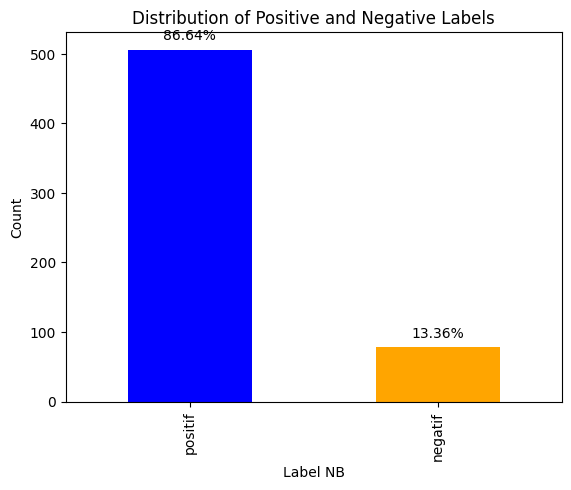

In [58]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = data_clean_baru['Label NB'].value_counts()

# Calculate the percentages
label_percentages = (label_counts / label_counts.sum()) * 100

# Create a bar plot
ax = label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Positive and Negative Labels')
plt.xlabel('Label NB')
plt.ylabel('Count')

# Add percentages on top of the bars
for i, count in enumerate(label_counts):
    percentage = label_percentages[i]
    ax.text(i, count + 10, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

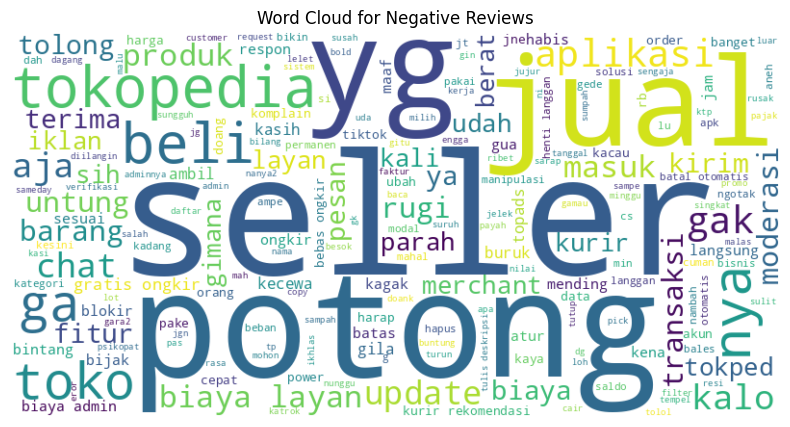

In [59]:
from wordcloud import WordCloud
negative_reviews = data_clean_baru[data_clean_baru['Label NB'] == 'negatif']['test_set'].dropna()

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


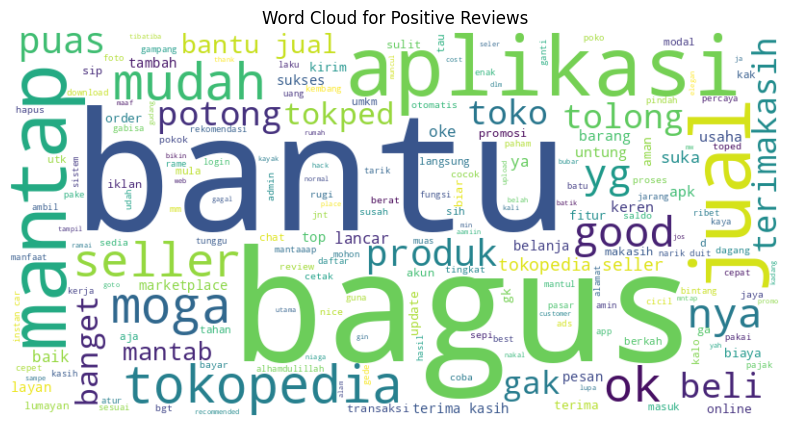

In [60]:
from wordcloud import WordCloud
negative_reviews = data_clean_baru[data_clean_baru['Label NB'] == 'positif']['test_set'].dropna()

# Combine all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


# Classification Report

In [61]:
from sklearn.metrics import classification_report, accuracy_score

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

# Print the classification report
print(report)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

     negatif       0.86      0.54      0.67       123
     positif       0.89      0.98      0.93       461

    accuracy                           0.89       584
   macro avg       0.87      0.76      0.80       584
weighted avg       0.88      0.89      0.88       584

Accuracy: 0.89
